# MEDICAL COST PERSONAL INSURANCE PROJECT

In [27]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data from csv file
df=pd.read_csv(r'c:/users/91991/downloads/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


IN THIS DATA WE HAVE THREE CATEGORICAL COLUMNS-SEX,SMOKER,REGION

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

in this dataset we have no missing values

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

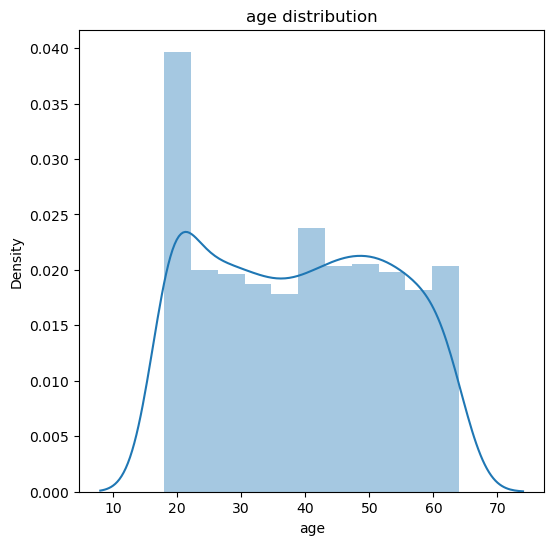

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

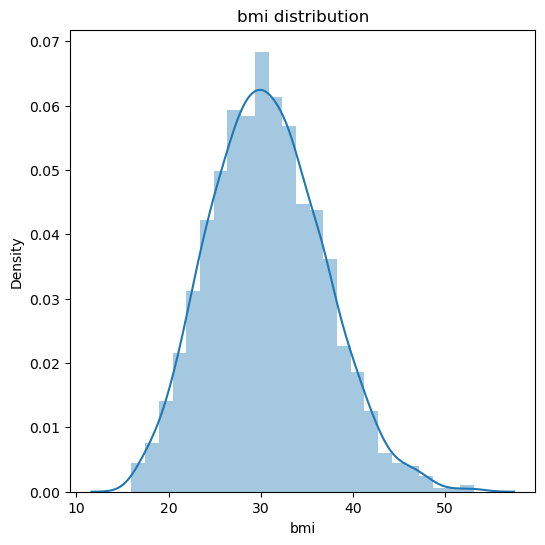

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

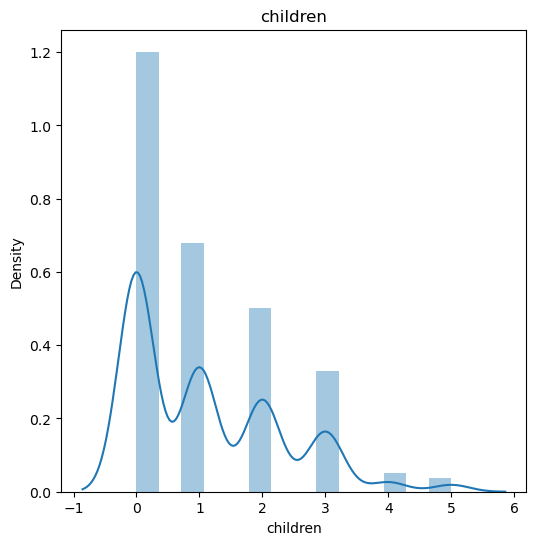

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['children'])
plt.title('children')
plt.show()

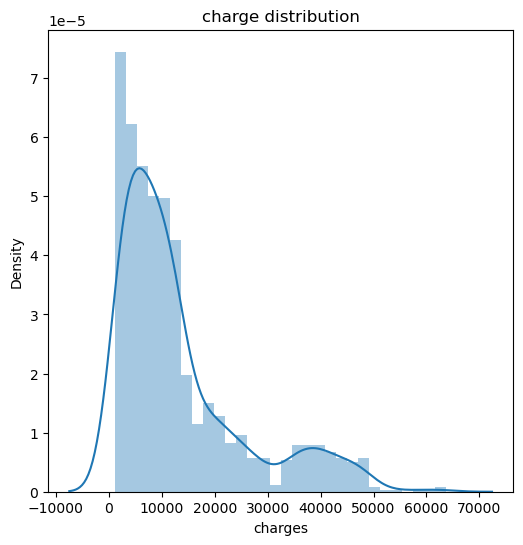

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charge distribution')
plt.show()

In [18]:
# now sice there are 3 columns with categorical data we will convert these columns into numerical by using encoding technique

# LABEL ENCODER

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [20]:
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

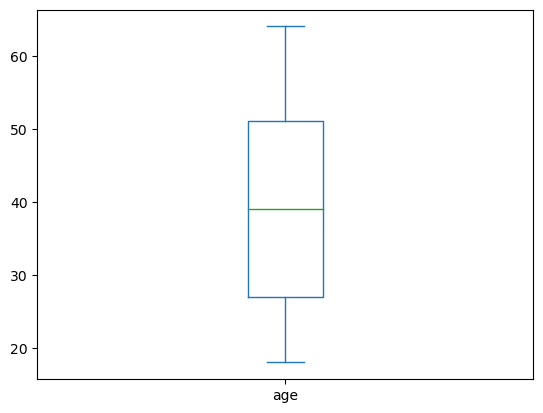

In [21]:
df['age'].plot.box()

<Axes: >

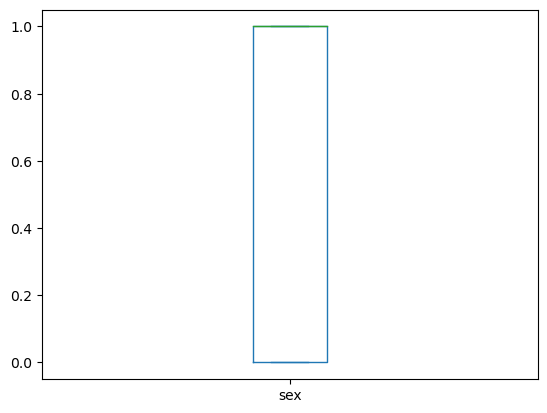

In [22]:
df['sex'].plot.box()

<Axes: >

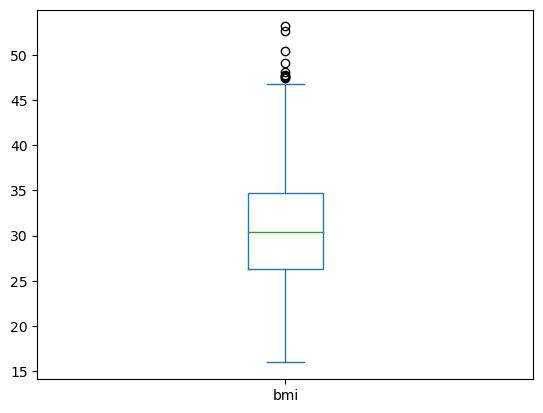

In [23]:
df['bmi'].plot.box()

<Axes: >

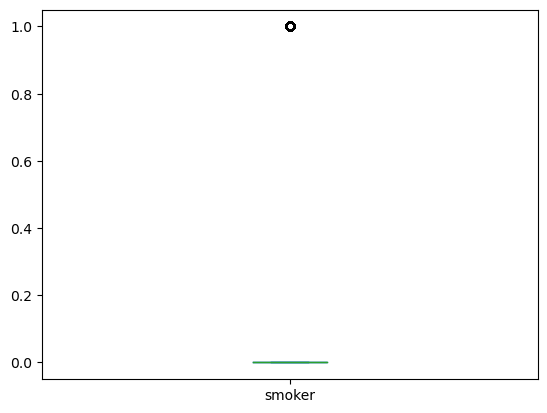

In [24]:
df['smoker'].plot.box()

<Axes: >

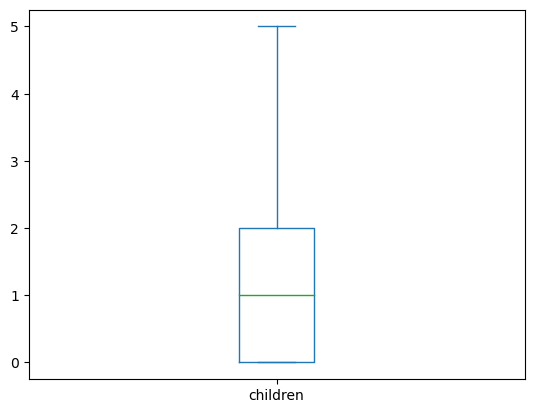

In [25]:
df['children'].plot.box()

CALLING THE ZSCORE LIBRARY TO REMOVE THE OUTLIERS

In [28]:
#removing outliers
z=np.abs(zscore(df))
z
 

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [29]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [31]:
z.iloc[32,3]

3.240618711442044

In [32]:
z.iloc[34,6]

3.132806075214621

In [33]:
z.iloc[1317,2]

3.685522232281654

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [35]:
df.shape

(1338, 7)

In [36]:
df_new.shape

(1309, 7)

In [37]:
#splitting the data into features and target
x=df.iloc[:,0:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [38]:
y=df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [52]:
y_train.shape

(1070,)

In [53]:
y_test.shape

(268,)

In [54]:
x_train.shape

(1070, 6)

In [55]:
x_test.shape

(268, 6)

In [56]:
lg=LinearRegression()

In [57]:
lg.fit(x_train,y_train)

LinearRegression()

In [58]:
lg.score(x_train,y_train)

0.7417049283233981

In [59]:
lgpred=lg.predict(x_test)

In [63]:
print('predicted value and actual value',y_test,lgpred)

predicted value and actual value 764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64 [ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309 28048.59793155  9424.36324087
  5326.32232088 38460.06017922 40303.40597026 37147.01010262
 15287.91876684 35965.05485917  9179.1753067  31510.8319849
  3797.79068365 10070.82803304  2312.57551348  7074.41348194
 11352.37224357 12907.77079523 14448.84678727  6205.65997921
  9917.00839638  2239.50032819  9060.55469043 13120.56214535
  4617.70702822  3467.91218926  4402.74821855 12967.91608907
  1927.44498944  8757.9180081  33324.35180597 32638.47697026
  3852.41756615  4370.39670883 14080.76023234 11478.63402576
  8829.26135924 12046.15119133  53

In [61]:
from sklearn.metrics import r2_score
print('r2_score',r2_score(y_test,lgpred))

r2_score 0.7833463107364538


r2_score lies between 0 to 1

In [115]:
#predicting the model
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lg.predict(testvalue)
    print(t)

In [116]:
testvalue=np.array([33,1,22.705,0,0,1])
predicttest(testvalue)

[3883.36513262]


THIS VALUE IS VERY CLOSE TO THE ACTUAL VALUE 3866